### Check distribution of # of topics per document

In [15]:
TOPIC_BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-biobert-mnli-reduce-outlier"

In [3]:
TOPIC_BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0612-window_size_2-step_2"

Average number of topics per document: 2.996146435452794
Max number of topics per document: 15
Min number of topics per document: 0


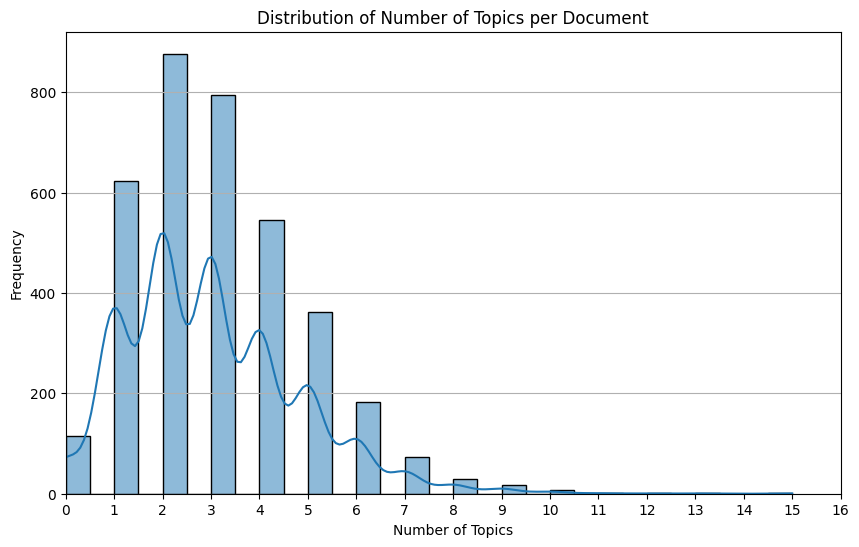

In [4]:
import json
with open(f"{TOPIC_BASE_DIR}/doc_topics.jsonl", "r") as f:
    corpus_topic = [json.loads(line) for line in f]
# average of topic num
topic_num = []
for doc in corpus_topic:
    topic_num.append(len(doc['topics']))

print(f"Average number of topics per document: {sum(topic_num) / len(topic_num)}")
print(f"Max number of topics per document: {max(topic_num)}")
print(f"Min number of topics per document: {min(topic_num)}")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(topic_num, bins=30, kde=True)
plt.title('Distribution of Number of Topics per Document')
plt.xlabel('Number of Topics')
plt.ylabel('Frequency')
plt.xlim(0, 16)
plt.xticks(np.arange(0, 17))
plt.grid(axis='y')
plt.show()

### check topic info dataframe

In [18]:
import pandas as pd

topic_info_df = pd.read_pickle(f"{TOPIC_BASE_DIR}/topic_info_dataframe.pkl")
display(topic_info_df)

,Topic,Count,Name,Representation,Representative_Docs
0,0,16928,0_and_of_in_the,"[and, of, in, the, to, for, with, was, were, d...",[RESULTS Mean BMI was lowest in vegans (23.6 k...
1,1,374,1_decreased_mmol_cholesterol_group,"[decreased, mmol, cholesterol, group, dl, mg d...",[Significant reductions were observed in LDL-C...
2,2,260,2_aged_years_health study_women,"[aged, years, health study, women, women aged,...",[Participants 66 105 women from the Nurses’ He...
3,3,241,3_no significant_no_significant differences_we...,"[no significant, no, significant differences, ...",[RESULTS: There were no significant difference...
4,4,234,4_curcumin_of curcumin_turmeric_curcuma,"[curcumin, of curcumin, turmeric, curcuma, tha...","[Curcumin (Cur), a component of turmeric (Curc..."
...,...,...,...,...,...
850,850,5,850_zinc_of zinc_rats fed_phytate,"[zinc, of zinc, rats fed, phytate, zinc metabo...",[Plasma zinc exchanged more rapidly with zinc ...
851,851,5,851_steps like_canning_drying_etc,"[steps like, canning, drying, etc, thermal, st...",[Various thermal processing treatments like pa...
852,852,5,852_their child_months postpartum_mothers_post...,"[their child, months postpartum, mothers, post...",[CONCLUSION: The vast majority of mothers over...
853,853,5,853_piperine_ahh_postmitochondrial supernatant...,"[piperine, ahh, postmitochondrial supernatant,...",[Piperine inhibition of these reactions in pos...


In [19]:
# write topic_info_df to a csv file
topic_info_df.to_csv(f"{TOPIC_BASE_DIR}/topic_info_dataframe.csv", index=False)

### Filter Representation using POS tagging

In [12]:
import pandas as pd
TOPIC_INFO_PICKLE = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-biobert-mnli/topic_info_dataframe.pkl"

topic_info_df = pd.read_pickle(TOPIC_INFO_PICKLE)
display(topic_info_df)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,16379,-1_and_of_the_in,"[and, of, the, in, to, for, were, with, was, i...",[RESULTS: In multivariate-logistic regression ...
1,0,508,0_vegetarians_vegetarian_vegan_omnivores,"[vegetarians, vegetarian, vegan, omnivores, ve...",[RESULTS Mean BMI was lowest in vegans (23.6 k...
2,1,432,1_decreased_cholesterol_ldl_mmol,"[decreased, cholesterol, ldl, mmol, 05, group,...",[Total and low-density lipoprotein (LDL) chole...
3,2,279,2_no significant_no_were no_significant differ...,"[no significant, no, were no, significant diff...",[RESULTS: There were no significant difference...
4,3,251,3_curcumin_of curcumin_turmeric_curcuma,"[curcumin, of curcumin, turmeric, curcuma, tha...",[Curcumin is the yellow pigment isolated from ...
...,...,...,...,...,...
839,838,5,838_immunostaining was_in any_immunostaining_n...,"[immunostaining was, in any, immunostaining, n...",[None of these products including the controls...
840,839,5,839_mtt_mtt assay_bromide mtt_by mtt,"[mtt, mtt assay, bromide mtt, by mtt, assay, v...",[Methods and results Cell proliferation and ce...
841,840,5,840_gases_charcoal containing_carbon fiber_odo...,"[gases, charcoal containing, carbon fiber, odo...",[The only product that adsorbed virtually all ...
842,841,5,841_industries_manufacturing_commodity industr...,"[industries, manufacturing, commodity industri...","[The strategy of ""manufacturing uncertainty"" h..."


In [2]:
from bertopic import BERTopic
topic_model = BERTopic.load("/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0605-biobert/bertopic_model")

In [5]:
all_topics = topic_model.get_topics()

In [6]:
for tid in all_topics.keys():
    if tid == -1:
        print(f"Topic {tid} is the outlier topic.")
        print(topic_model.get_topic(tid))
        break

Topic -1 is the outlier topic.
[('in', 0.0015526264042618988), ('the', 0.0015470998490340314), ('of', 0.0015406184756981594), ('and', 0.001498641020314179), ('to', 0.001459622480681719), ('that', 0.0014588326296348676), ('on', 0.0013597286226671877), ('as', 0.0013476458386830004), ('is', 0.0013392577686293097), ('this', 0.0013261930394164294), ('with', 0.001319766536553793), ('be', 0.0013069527396031757), ('are', 0.0012795711432484972), ('in the', 0.0012769387056145922), ('from', 0.001232174362927369), ('of the', 0.0012299046119901352), ('have', 0.0012254080433990767), ('for', 0.0012060990128021794), ('by', 0.0012010417256540786), ('was', 0.001174709124491037)]


In [ ]:
import argparse, json, collections, random, os, sys
import nltk; nltk.download("punkt", quiet=True)
from nltk import sent_tokenize
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

CORPUS_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl"
EMBED_MODEL = "pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb"

random.seed(42)

def sliding_windows(sentences, size=4, step=2):
    """Yield overlapping sentence windows."""
    i = 0
    while i < len(sentences):
        chunk = " ".join(sentences[i : i + size]).strip()
        if chunk:
            yield chunk
        i += step

def chunk_document(text, mode="sentence", win_size=4, win_step=2):
    """
    Break `text` into chunks according to `mode`.
    Returns a list of string chunks.
    """
    sents = sent_tokenize(text)
    if mode == "sentence":
        return [s.strip() for s in sents if s.strip()]
    elif mode == "window":
        return list(sliding_windows(sents, size=win_size, step=win_step))
    else:
        raise ValueError(f"Unknown chunk_mode: {mode}")


# Build chunks
chunks, chunk_owner = [], []
doc2chunk_idx = collections.defaultdict(list)

with open(CORPUS_PATH, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        doc_id, text = obj.get("_id"), obj.get("text", "")
        if doc_id is None or not isinstance(text, str):
            continue
        doc_chunks = chunk_document(text, mode="sentence")
        for ch in doc_chunks:
            idx = len(chunks)
            chunks.append(ch)
            chunk_owner.append(doc_id)
            doc2chunk_idx[doc_id].append(idx)

print(f"Built {len(chunks):,} chunks from {len(doc2chunk_idx):,} documents.")

# Initialize embedding model (ensure device is correct)
try:
    embedder = SentenceTransformer(EMBED_MODEL, device="cuda")
except Exception as e:
    print(f"Error loading embedder '{EMBED_MODEL}' on 'cuda': {e}", file=sys.stderr)
    sys.exit(1)


pos_patterns = [
    [{'POS': 'ADJ'},  {'POS': 'NOUN'}],   # adjective-noun, e.g. "gene expression"
    [{'POS': 'NOUN'}],                    # single noun,  e.g. "oncogene"
    [{'POS': 'PROPN'}]                    # proper noun  e.g. "CRISPR"
]

pos = PartOfSpeech("en_core_sci_sm", pos_patterns=pos_patterns, top_n_words=250)
keybert = KeyBERTInspired(nr_candidate_words=100, nr_repr_docs=5, top_n_words=25)
mmr = MaximalMarginalRelevance(diversity=0.6, top_n_words=10)

representation_chain = [pos, keybert, mmr]

vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=5)

# Initialize BERTopic
topic_model = BERTopic(
    embedding_model=embedder,
    umap_model=UMAP(n_components=5, metric="cosine"),
    min_topic_size=5,
    vectorizer_model=vectorizer,
    representation_model=representation_chain,
    verbose=True
)

# Fit and transform
topics, probs = topic_model.fit_transform(chunks)

topic_model.get_topic_info()

Built 35,130 chunks from 3,633 documents.


2025-06-06 16:32:47,483 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1098/1098 [00:27<00:00, 39.28it/s]
2025-06-06 16:33:15,818 - BERTopic - Embedding - Completed ✓
2025-06-06 16:33:15,819 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-06 16:33:43,227 - BERTopic - Dimensionality - Completed ✓
2025-06-06 16:33:43,231 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-06 16:33:44,818 - BERTopic - Cluster - Completed ✓
2025-06-06 16:33:44,827 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-06 16:34:59,373 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,16375,-1_cholesterol_intakes_health_95 ci,"[cholesterol, intakes, health, 95 ci, cohort, ...",[The highest adherence to MD category resulted...
1,0,605,0_vegetarian diet_diet results_omnivores_fibre...,"[vegetarian diet, diet results, omnivores, fib...",[Cases of diabetes developed in 0.54% of vegan...
2,1,388,1_intake fish_methylmercury_health risks_polyu...,"[intake fish, methylmercury, health risks, pol...",[Discussion: There are many possible combinati...
3,2,277,2_groups results_remained unchanged_changes ob...,"[groups results, remained unchanged, changes o...","[In contrast, there were no statistically sign..."
4,3,237,3_curcumin_turmeric_chemopreventive_medicinal,"[curcumin, turmeric, chemopreventive, medicina...",[Although much has been published about curcum...
...,...,...,...,...,...
839,838,5,838_docosahexaenoic acid dha_fatty acid_omega_...,"[docosahexaenoic acid dha, fatty acid, omega, ...",[Docosahexaenoic acid (DHA) is an omega-3 fatt...
840,839,5,839_catechin_epicatechin_quercetin_genistein,"[catechin, epicatechin, quercetin, genistein, ...",[Autoradiography of cannabinoid receptors in b...
841,840,5,840_cancer risk_risk dietary_epidemiological s...,"[cancer risk, risk dietary, epidemiological st...","[Therefore, continued epidemiologic investigat..."
842,841,5,841_prevention dietary_supplements_antioxidant...,"[prevention dietary, supplements, antioxidant,...","[If these findings could be generalised, and i..."


In [22]:
TOPIC_BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/representations"
CORPUS_DOCS_OUTPUT_PATH = f"{TOPIC_BASE_DIR}/doc_topics.jsonl"
with open(CORPUS_DOCS_OUTPUT_PATH, "w", encoding="utf-8") as fout:
    for doc_id, idx_list in doc2chunk_idx.items():
        freq = collections.Counter(topics[i] for i in idx_list if topics[i] != -1)
        total = sum(freq.values())
        topic_entries = []
        for tid, cnt in freq.items():
            topic_entries.append({"topic_id": int(tid), "weight": round(cnt / total, 6)})
        fout.write(json.dumps({"doc_id": doc_id, "topics": topic_entries}, ensure_ascii=False) + "\n")

print(f"Wrote document-topic distributions to '{CORPUS_DOCS_OUTPUT_PATH}'")

Wrote document-topic distributions to '/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/representations/doc_topics.jsonl'


In [1]:
topic_info_df = topic_model.get_topic_info()
topic_info_df.to_pickle(f"{TOPIC_BASE_DIR}/topic_info_dataframe.pkl")

NameError: name 'topic_model' is not defined

In [2]:
import pandas as pd
topic_info_df = pd.read_pickle("/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/topic_info_dataframe.pkl")
topic_info_df.to_csv(f"/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/topic_info_dataframe.csv", index=False)

### Enforce Minimum Topic for each document

In [ ]:
with open("/tmp/doc_topics.jsonl", "r") as f:
    corpus_topic = [json.loads(line) for line in f]
print("\n".join(f"{doc['doc_id']}: {doc['topics']}" for doc in corpus_topic[:5]))

CORPUS_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl"
corpus_text = {}
with open(CORPUS_PATH, "r", encoding="utf-8") as f:
    corpus_text = {json.loads(line).get("_id"): json.loads(line).get("text", "") for line in f}

print(f"Loaded {len(corpus_text):,} documents from '{CORPUS_PATH}'")

MED-10: [{'topic_id': 72, 'weight': 0.5}, {'topic_id': 59, 'weight': 0.25}, {'topic_id': 63, 'weight': 0.25}]
MED-14: [{'topic_id': 72, 'weight': 0.4}, {'topic_id': 813, 'weight': 0.2}, {'topic_id': 63, 'weight': 0.2}, {'topic_id': 12, 'weight': 0.2}]
MED-118: [{'topic_id': 569, 'weight': 0.8}, {'topic_id': 400, 'weight': 0.2}]
MED-301: [{'topic_id': 116, 'weight': 0.2}, {'topic_id': 785, 'weight': 0.2}, {'topic_id': 616, 'weight': 0.2}, {'topic_id': 483, 'weight': 0.4}]
MED-306: [{'topic_id': 280, 'weight': 0.222222}, {'topic_id': 78, 'weight': 0.444444}, {'topic_id': 2, 'weight': 0.111111}, {'topic_id': 83, 'weight': 0.111111}, {'topic_id': 695, 'weight': 0.111111}]
Loaded 3,633 documents from '/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl'


In [ ]:
for doc in corpus_topic:
    if len(doc['topics']) < 2:
        print(f"Document {doc['doc_id']} has less than 2 topics: {doc['topics']}")
        
        sents = chunk_document(corpus_text[doc['doc_id']])
        print(f"Document {doc['doc_id']} has only {len(doc['topics'])} topic(s), but {len(sents)} sentences.")
        print(f"Text: {corpus_text[doc['doc_id']]}")
        
        # use soft distribution over all topics
        sent_dists = topic_model.approximate_distribution(sents)[0]
        top1_per_sent = np.argmax(sent_dists, axis=1)
        for topic in set(top1_per_sent):
            print(f"Topic {topic}: {topic_model.get_topic(topic)}")
        break


Document MED-332 has less than 2 topics: [{'topic_id': 18, 'weight': 1.0}]
Document MED-332 has only 1 topic(s), but 8 sentences.
Text: This review explores the potential adverse impact of the increasing phosphorus content in the American diet on renal, cardiovascular, and bone health of the general population. Increasingly, studies show that phosphorus intakes in excess of the nutrient needs of a healthy population may significantly disrupt the hormonal regulation of phosphate, calcium, and vitamin D, which contributes to disordered mineral metabolism, vascular calcification, impaired kidney function, and bone loss. Moreover, large epidemiologic studies suggest that mild elevations of serum phosphate within the normal range are associated with cardiovascular disease (CVD) risk in healthy populations without evidence of kidney disease. However, few studies linked high dietary phosphorus intake to mild changes in serum phosphate because of the nature of the study design and inaccuracies

100%|██████████| 1/1 [00:00<00:00, 27.98it/s]

Topic 64: [('endocrine', 0.03452835714743812), ('disrupting', 0.012987390975246404), ('chemicals', 0.012197652256695732), ('endocrine disruption', 0.011436961461891671), ('endocrine disrupting', 0.011211927121364866), ('endocrine disruptors', 0.008969541697091894), ('disruptors', 0.008969541697091894), ('disruption', 0.008612284532314399), ('exposure to', 0.007912359637821414), ('chemicals with', 0.007903260915948998), ('disrupting chemicals', 0.007903260915948998), ('disrupters', 0.007903260915948998), ('endocrine disrupters', 0.007903260915948998), ('an endocrine', 0.007616525099553058), ('endocrine disruptor', 0.007616525099553058), ('between exposure', 0.007616525099553058), ('environment', 0.007390163858584282), ('disruptor', 0.00738237198219534), ('estrogens', 0.007102737934657665), ('with hormone', 0.006862176877135003)]
Topic 18: [('phosphorus', 0.04900100163472211), ('phosphate', 0.025000051650600184), ('additives', 0.01944853804788), ('phosphorus content', 0.01692979412943063

In [34]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13699,-1_the_of_in_and,"[the, of, in, and, to, for, were, on, with, that]","[Among premenopausal women only, there was a r..."
1,0,522,0_vegetarians_vegetarian_vegan_omnivores,"[vegetarians, vegetarian, vegan, omnivores, ve...",[Cases of diabetes developed in 0.54% of vegan...
2,1,348,1_decreased_mg dl_dl_cholesterol,"[decreased, mg dl, dl, cholesterol, mmol, 05, ...",[Total cholesterol/high-density lipoprotein an...
3,2,249,2_no significant_were no_significant differenc...,"[no significant, were no, significant differen...",[There were no statistically significant diffe...
4,3,253,3_food frequency_questionnaire_frequency quest...,"[food frequency, questionnaire, frequency ques...",[Diet was assessed by using food-frequency que...
...,...,...,...,...,...
847,846,6,846_injection q3dx5_q3dx5_injection_mouse inje...,"[injection q3dx5, q3dx5, injection, mouse inje...",[Cetuximab treatment alone (0.25-1 mg/mouse/in...
848,847,5,847_green tea_tea_green_gallate,"[green tea, tea, green, gallate, scavenging, e...",[Therefore the cytoprotective effects of green...
849,848,9,848_occupational_non occupational_asbestos_occ...,"[occupational, non occupational, asbestos, occ...",[This paper reviews existing data related to n...
850,849,10,849_like growth_insulin like_igf_growth factor,"[like growth, insulin like, igf, growth factor...",[BACKGROUND: Insulin-like growth factor (IGF)-...


## 0606 Experiment: Check if topic model for query inference is okay
主要是想看看 topic model 在訓練時是用 document sentences 做 clustering，而 training 時如要用 query inference 的話，是否會有問題。（因為存在 distribution gap）

In [1]:
from bertopic import BERTopic
topic_model = BERTopic.load("/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/bertopic_model")
topic_model.get_topic_info()

/home/guest/r12922050/miniconda3/envs/bertopic/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Topic,Count,Name,Representation,Representative_Docs
0,-1,16253,-1_cholesterol_dietary_risk_vegetables,"[cholesterol, dietary, risk, vegetables, signi...","[Compared with levels less than 160 mg/dL, hig..."
1,0,524,0_vegetarian diets_diet results_lactobacilli_a...,"[vegetarian diets, diet results, lactobacilli,...","[Participants were grouped as vegan, lacto ovo..."
2,1,522,1_fish intake_methylmercury_arsenic_human health,"[fish intake, methylmercury, arsenic, human he...",[Similar correlation coefficients were observe...
3,2,365,2_cholesterol low_weight loss_triglycerides_si...,"[cholesterol low, weight loss, triglycerides, ...",[A favorable reduction in total cholesterol (1...
4,3,231,3_difference groups_changes observed_unaffecte...,"[difference groups, changes observed, unaffect...",[RESULTS: There were no significant difference...
...,...,...,...,...,...
860,859,5,859_increased risks_cancers combined_hyperchol...,"[increased risks, cancers combined, hyperchole...","[However, rates increased (2.7% per year) for ..."
861,860,5,860_lowest quintile_serum enterolactone_54_pre...,"[lowest quintile, serum enterolactone, 54, pre...",[RESULTS: Of the nutrition-relevant predictors...
862,861,5,861_dietary protein_digestion_fermentation_int...,"[dietary protein, digestion, fermentation, int...",[A significantly higher percentage of the mala...
863,862,5,862_sperm concentration_vitamin intake_older m...,"[sperm concentration, vitamin intake, older me...",[The older men with the highest intake of thes...


In [6]:
import json
QUERIES_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/queries.jsonl"
with open(QUERIES_PATH, "r", encoding="utf-8") as f:
    queries = [json.loads(line) for line in f]

queries_texts = [query['text'] for query in queries]
print(len(queries_texts), "queries loaded.")
print(f"First 5 queries: {queries_texts[:5]}")

3237 queries loaded.
First 5 queries: ['Breast Cancer Cells Feed on Cholesterol', 'Using Diet to Treat Asthma and Eczema', 'Treating Asthma With Plants vs. Pills', 'How Fruits and Vegetables Can Treat Asthma', 'How Fruits and Vegetables Can Prevent Asthma']


In [7]:
query_topics, _ = topic_model.transform(queries_texts)

Batches: 100%|██████████| 102/102 [00:01<00:00, 53.91it/s] 


In [9]:
print(f"First 5 query topics: {query_topics[:5]}")

First 5 query topics: [-1, -1, 187, -1, -1]


In [10]:
# count -1 topics
num_outliers = sum(1 for topic in query_topics if topic == -1)
print(f"Number of outlier topics in queries: {num_outliers}")

Number of outlier topics in queries: 1873


結論：直接用 document sentences 做 clustering，然後用 query inference 會造成很多 query inference 的 topic 都是 -1 (outlier)，所以需要使用其他方法 (maybe probability-based topic assignment) 對 query 的 topic 進行分配。

### softmax over topic centroids to perform topic assignment
For every query, compute cosine scores to all centroids, apply softmax( sim/τ ), then aggregate.
- Why it helps? Removes the hard boundary altogether; yields a true prob dist Q.
- Tradeoff: Need to pick τ; small τ → peaky but still smooth.

In [16]:
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F
import torch


EMBED_MODEL = "pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb"
embedder = SentenceTransformer(EMBED_MODEL, device="cuda")
q_embs = embedder.encode(queries_texts, convert_to_tensor=True,
                            normalize_embeddings=True)          # (N, d)

centroids = torch.tensor(topic_model.topic_embeddings_, dtype=torch.float32)
centroids = centroids[1:].to(q_embs.device)  # skip outlier topic
centroids = torch.nn.functional.normalize(centroids, dim=1)

τ   = 0.07                                   # temperature – tune on dev set
logits = (q_embs @ centroids.T) / τ          # (N, K)

probs  = F.softmax(logits, dim=1)            # (N, K) soft assignment
labels = probs.argmax(dim=1).tolist()        # hard “closest topic” if needed

In [21]:
TOPIC_BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr"
with open(f"{TOPIC_BASE_DIR}/query_topics.jsonl", "w", encoding="utf-8") as fout:
    for label, query in zip(labels, queries):
        fout.write(json.dumps({"query_id": query["_id"], "text": query['text'], "topic_id": label}, ensure_ascii=False) + "\n")


#### Check inferenced query topic 實際上與 對應的 document topics 的關連程度

In [28]:
import json
import pandas as pd

DOC_TOPICS_PATH = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/doc_topics.jsonl"
QUERY_TOPICS_PATH = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/query_topics.jsonl"
DEV_QRELS_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/qrels/dev.tsv"
TEST_QRELS_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/qrels/test.tsv"

with open(DOC_TOPICS_PATH, "r") as f:
    corpus_topic = [json.loads(line) for line in f]

with open(QUERY_TOPICS_PATH, "r") as f:
    query_topic = [json.loads(line) for line in f]

corpus_topic_dict = {doc['doc_id']: [topic['topic_id'] for topic in doc['topics']] for doc in corpus_topic}
query_topic_dict = {query['query_id']: query['topic_id'] for query in query_topic}

dev_qrels = pd.read_csv(DEV_QRELS_PATH, sep="\t") # query-id, corpus-id, score
test_qrels = pd.read_csv(TEST_QRELS_PATH, sep="\t") # query-id, corpus-id, score

qrels = pd.concat([dev_qrels, test_qrels], ignore_index=True)
# keep rows where score > 0
qrels = qrels[qrels['score'] > 0]

query_docs = qrels.groupby('query-id')['corpus-id'].apply(list).to_dict()

# calculate hit rate for each query topic and its corresponding document topics
hit_cnt = 0
for query_id, doc_ids in query_docs.items():
    hit = False # if any document's topic matches query topic we consider it a hit
    query_topic_id = query_topic_dict[query_id]
    doc_topic_ids = []
    for doc_id in doc_ids:
        doc_topic_ids.extend(corpus_topic_dict.get(doc_id, [])) 
    if query_topic_id in doc_topic_ids:
        hit = True
    if hit:
        hit_cnt += 1
hit_rate = hit_cnt / len(query_docs) if query_docs else 0
print(f"Hit rate: {hit_rate:.4f} ({hit_cnt} hits out of {len(query_docs)} queries)")



Hit rate: 0.4359 (282 hits out of 647 queries)


In [ ]:
avg_docs_per_query = sum(len(doc_ids) for doc_ids in query_docs.values()) / len(query_docs) if query_docs else 0
print(f"Average number of documents per query: {avg_docs_per_query:.2f}")

Average number of documents per query: 36.66


更新「隨機命中率」(naïve baseline)估算

> **公式回顧**
> 若隨機為一條查詢指定 1 個 topic，
> 命中率 ≈  (該查詢所有相關文件的「獨特 topic 數」) ÷ (總 cluster 數 K)

---

已知條件

* **K = 865**（你目前的 NF-Corpus 聚類結果）
* **平均相關文件數 n = 36.66**（每條查詢在 qrels 裡對應的 doc 數）

---

步驟 1 估計「獨特 topic 數」

若每篇文件只有 **1 個主題**（最保守）

$$
U = K\!\left[1-\!\left(1-\frac1K\right)^{n}\right]
$$

$$
U ≈ 865 \times \Bigl[1-\bigl(1-\tfrac1{865}\bigr)^{36.66}\Bigr] ≈ 35.9
$$

---

步驟 2 得到隨機命中率

$$
P_{\text{hit}} = \frac{U}{K} ≈ \frac{35.9}{865} ≈ 4.1\%
$$

---

若每篇文件平均帶 **>1 個 topic**

| 假設每篇文件平均 topic 數 | n × topic/文件 | 估計獨特 topic U | 隨機命中率     |
| ---------------- | ------------ | ------------ | --------- |
| 1.0 (保守)         | 36.66        | 35.9         | **4.1 %** |
| 1.5              | 54.99        | 52.7         | **6.1 %** |
| 2.0              | 73.32        | 70.3         | **8.1 %** |

*(公式同上，只是把 exponent 換成 n × avgTopicsPerDoc)*

---

與你的 0.436 命中率相比

* **4 % – 8 % vs 43.6 %**
  → 你的軟指派方法仍舊比隨機 **高出約 5–10 倍**。

---

結論與建議

* 0.436 不是 “perfect”，但確實遠優於隨機基線，已足以為 RL 提供有訊號的回饋。
* 仍有進步空間（前述 multi-label、調 τ、增量更新 centroids 等），但目前的基準可作為合理的下限參考。


In [30]:
k = 865
n = 73.32
u = k*(1-(1-1/865)**n)
random_hit = u/k
print(f"Random hit rate: {random_hit:.4f} (k={k}, n={n})")

Random hit rate: 0.0813 (k=865, n=73.32)


## 0608 Experiment: Check topic modeling keywords 能否幫助 retrieval performance

In [17]:
import json
import pandas as pd
with open("/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/doc_topics.jsonl", "r") as f:
    corpus_topic = [json.loads(line) for line in f]
topic_info_df = pd.read_pickle("/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/0606-pritamdeka-biobert-pos-keybert-mmr/topic_info_dataframe.pkl")

with open("/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl", "r") as f:
    corpus = [json.loads(line) for line in f]

corpus_topic = {doc['doc_id']: doc['topics'] for doc in corpus_topic}
print("Topic Info DataFrame:")
display(topic_info_df)

topic_keywords = {} # {topic_id: [keyword1, keyword2, ...]}
for tid, topic in topic_info_df.iterrows():
    if tid == -1:
        continue
    keywords = topic['Representation']
    topic_keywords[tid] = keywords

# for every document, add their topic keywords
for doc in corpus:
    doc_id = doc.pop('_id', None)
    doc['id'] = doc_id
    keywords = []
    for topic in corpus_topic[doc_id]:
        topic_id = topic['topic_id']
        if topic_id in topic_keywords:
            keywords.extend(topic_keywords[topic_id][:7])
    doc['predicted_queries'] = keywords
# save updated corpus_topic with predicted queries
with open("/home/guest/r12922050/GitHub/d2qplus/gen/nfcorpus/doc_add_topic_top_7_keywords.jsonl", "w") as f:
    for doc in corpus:
        f.write(json.dumps(doc, ensure_ascii=False) + "\n")

Topic Info DataFrame:


,Topic,Count,Name,Representation,Representative_Docs
0,-1,16253,-1_cholesterol_dietary_risk_vegetables,"[cholesterol, dietary, risk, vegetables, signi...","[Compared with levels less than 160 mg/dL, hig..."
1,0,524,0_vegetarian diets_diet results_lactobacilli_a...,"[vegetarian diets, diet results, lactobacilli,...","[Participants were grouped as vegan, lacto ovo..."
2,1,522,1_fish intake_methylmercury_arsenic_human health,"[fish intake, methylmercury, arsenic, human he...",[Similar correlation coefficients were observe...
3,2,365,2_cholesterol low_weight loss_triglycerides_si...,"[cholesterol low, weight loss, triglycerides, ...",[A favorable reduction in total cholesterol (1...
4,3,231,3_difference groups_changes observed_unaffecte...,"[difference groups, changes observed, unaffect...",[RESULTS: There were no significant difference...
...,...,...,...,...,...
860,859,5,859_increased risks_cancers combined_hyperchol...,"[increased risks, cancers combined, hyperchole...","[However, rates increased (2.7% per year) for ..."
861,860,5,860_lowest quintile_serum enterolactone_54_pre...,"[lowest quintile, serum enterolactone, 54, pre...",[RESULTS: Of the nutrition-relevant predictors...
862,861,5,861_dietary protein_digestion_fermentation_int...,"[dietary protein, digestion, fermentation, int...",[A significantly higher percentage of the mala...
863,862,5,862_sperm concentration_vitamin intake_older m...,"[sperm concentration, vitamin intake, older me...",[The older men with the highest intake of thes...
